# Lab 7: Simple linear regression

### Learning Goals

- Understanding the basic mathematics of simple regression
- How to compute a simple linear regression using python and statsmodels
- How to plot a regression line over data
- Understand how standard errors represent uncertainty
- Understanding how to make prediction estimates and prediction intervals. 
- How to do a Monte-Carlo "fake data" simulation

### Literature

ROS: 6, 7, 8

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=092ef0f2-9dfb-42f0-a0e7-af0400bb3253&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Regression is central to statistics and we will spend most of the rest of the semester investigating a small subset of the various regression tools. We will have a focus on understanding and building basic tools, which then give you the ability to go in whatever direction you wish after that. 

We load in some packages that will be helpful

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt

#new packages
import statsmodels as sms
import statsmodels.formula.api as smf
import seaborn as sns

from cycler import cycler

plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams["axes.labelsize"]= 12
plt.rcParams["figure.facecolor"] = "#f2f2f2"
#plt.rcParams['figure.savefig.dpi'] = 100
plt.rcParams['savefig.edgecolor'] = "#f2f2f2"
plt.rcParams['savefig.facecolor'] ="#f2f2f2"
plt.rcParams["figure.figsize"] = [16,10]
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['font.size'] = 14
greens = ['#66c2a4','#41ae76','#238b45','#006d2c','#00441b']
multi =['#66c2a4','#1f78b4','#a6cee3','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f']
plt.rcParams["axes.prop_cycle"] = cycler(color=multi)



Before getting into the details, we start with a simple example to build a bit of intuition about what we are doing with regression.

We start by simulating a dataset according to a linear model, and then running a regression through statsmodels to estimate the parameters of our fake dataset. 

We want to create data corresponding to the following simple relationship: 

$y_i = a + bx_i + \epsilon_i$

$\epsilon_i \sim N(0,\sigma)$

That is we have a linear relationship between x and y but also noise/randomness ($\epsilon_i$) which is normally distributed with a 0 mean and standard deviation ($\sigma$)

In [2]:
n = 100
x = np.linspace(0,20,n) # create n equally spaced numbers between 0 and 20
sigma = 4
a= .4
b= .8
epsilon = spt.norm.rvs(0,sigma,n,random_state=1234)
y = a + b*x + epsilon

above I use the random number generator from scipy.stats (spt), which allows me to set the "random state", so that the same "random" numbers are generated each time

In [3]:
fakeDF = pd.DataFrame({"x":x, "y":y})
fakeDF

,x,y
0,0.000000,2.285741
1,0.202020,-4.202287
2,0.404040,6.454060
3,0.606061,-0.365759
4,0.808081,-1.835890
...,...,...
95,19.191919,15.425747
96,19.393939,14.536087
97,19.595960,18.189920
98,19.797980,11.962429


<AxesSubplot:xlabel='x', ylabel='y'>

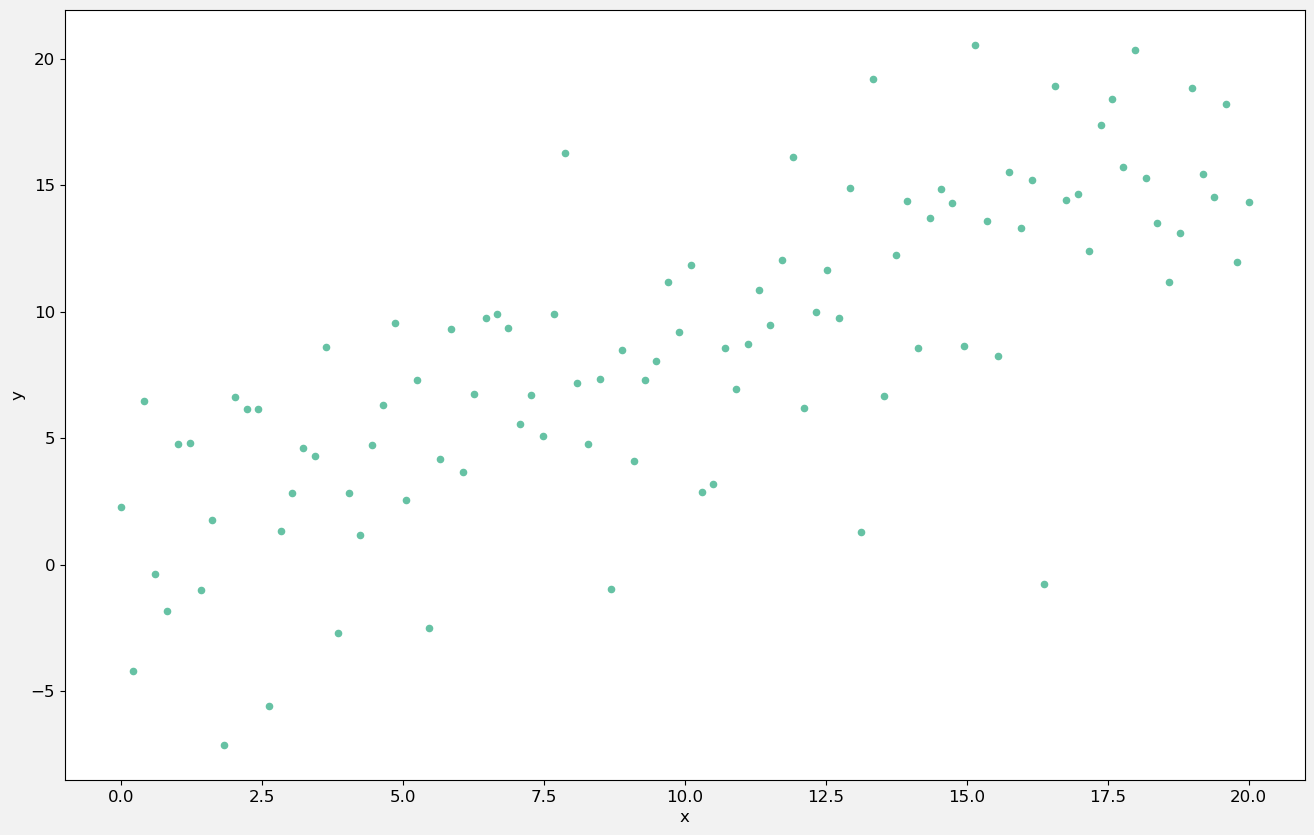

In [4]:
fig, ax = plt.subplots()
fakeDF.plot.scatter(x="x", y="y", ax=ax)

Above is our data. We see the clear positive association between x and y, even though there is also a good deal of noise. 

Now we will try to estimate a and b using the regression routine (OLS) in statsmodels:

In [5]:
mod1 = smf.ols(formula='y~x', data=fakeDF).fit()

In statsmodels, there are two ways of writing a regression model (that is why we import both sms and smf when we loaded our packages). The above is in "r style" formula.

A difference between r and Python compared to many commercial software packages is that all the results are not spit out as a printout. 

Instead, the results of the fitted regression model are stored in an object, here *mod1*

We can easily get a summary: 

In [6]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     129.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           1.15e-19
Time:                        15:33:22   Log-Likelihood:                -280.07
No. Observations:                 100   AIC:                             564.1
Df Residuals:                      98   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6782      0.798      0.849      0.398      -0.906       2.263
x              0.7862      0.069     11.398      0.000       0.649       0.923
==============================================================================
Omnibus:                       10.734   Durbin-Watson:                   2.430
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.741
Skew:                          -0.640   Prob(JB):                      0.00282
Kurtosis:                       4.086   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We will have much more to say about many of these values, but let us focus on the coefficient results. 

The intercept, is what we have called "a". The **point estimate** here is approximately .68 (results may vary since we randomly generated the data). This is quite far from our "true" value of .4. But notice that the standard error is also given, and this is quite large: here .80 (thus this is estimated with quite a lot of uncertainty). Often in academic papers, only the coefficient and standard error are given. To get a quick approximate 95% confidence interval, you can take: 

approx 95% CI = coefficient estimate +/- 2*SE

CI: .68 +/- 2*.80 => -.92 to 2.28 (which includes our "true value of .4)

Here we see that we are provided with an exact 95% confidence interval based on t-values. 

We also get a p-value of .159. 

But we are often more interested on the estimated coefficient on our x-value, which we call b. 

Here we get an estimate of .79

A quick confidence interval gives: .69 +/-2*.07 = .55 to .83, which includes our "true" value of .8 

We can also get an estimate of the standard deviation in our model ($\sigma$), by first getting the mean squared error of our regression-that is measuring the vertical distance between our regression line and the actual data points, squaring these and taking the mean. This is an estimate of our model variance. Taking the square root, will give us an estimate of our standard deviation, called our residual standard deviation:

In [7]:
np.sqrt(mod1.mse_resid)

4.0223554636668535

Not far from our "true" value of $\sigma=4$. With a little work, we could also create standard errors and a confidence interval using the chi-squared distribution (see lab 6). 

Let's plot the regression line with the data. I can extract the estimated coefficients directly from the *mod1* object

In [8]:
mod1.params

Intercept    0.678239
x            0.786221
dtype: float64

In [9]:
a_hat = mod1.params[0]
b_hat = mod1.params[1]

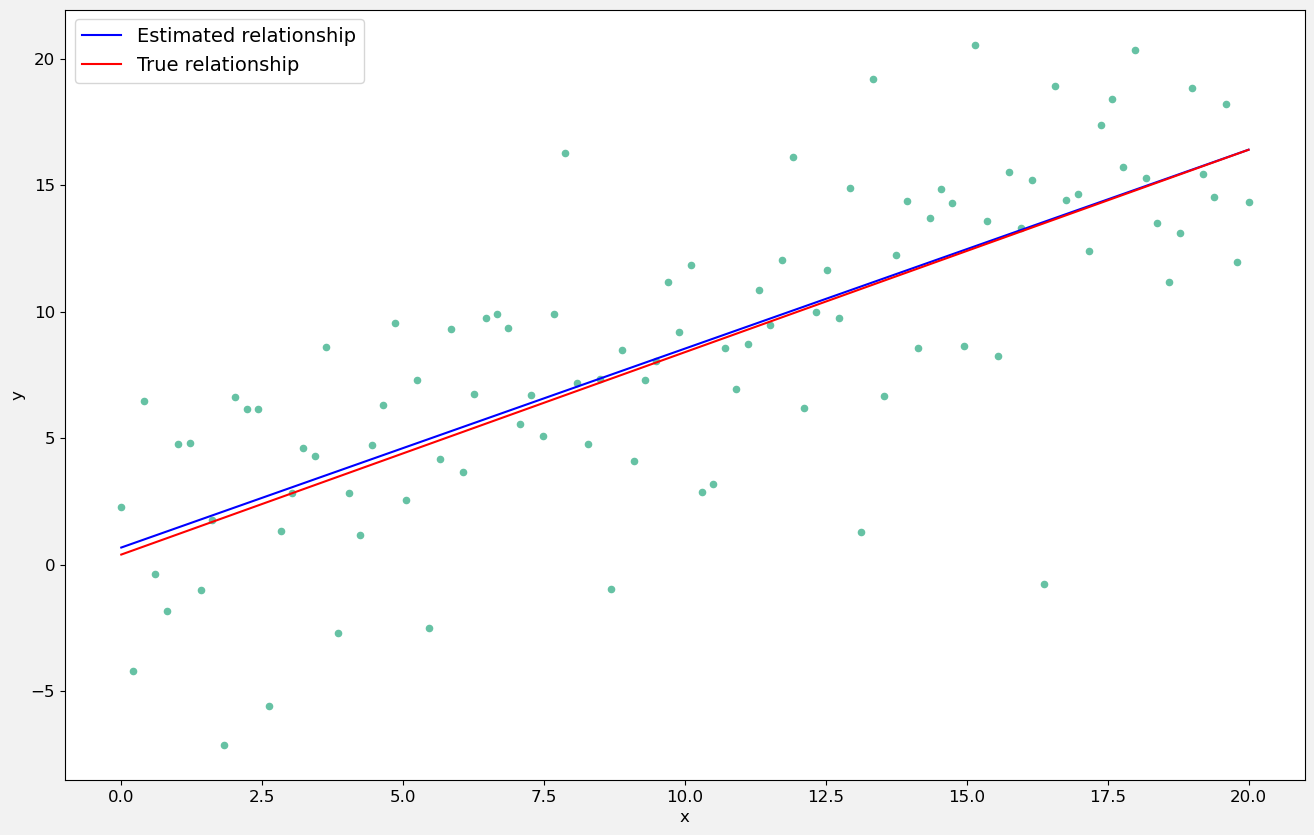

In [10]:
fig, ax = plt.subplots()
fakeDF.plot.scatter(x="x", y="y", ax=ax)
ax.plot(fakeDF["x"], a_hat + b_hat*fakeDF["x"], color="blue", label="Estimated relationship")
ax.plot(fakeDF["x"], a + b*fakeDF["x"], color="red", label="True relationship")
plt.legend()

In the above we also include a line representing the "true" relationship: y=a+bx

Recall from lab 5 that drawing a regression line over a data is something we do so common, that there is a specialty command for it in the seaborn package: 

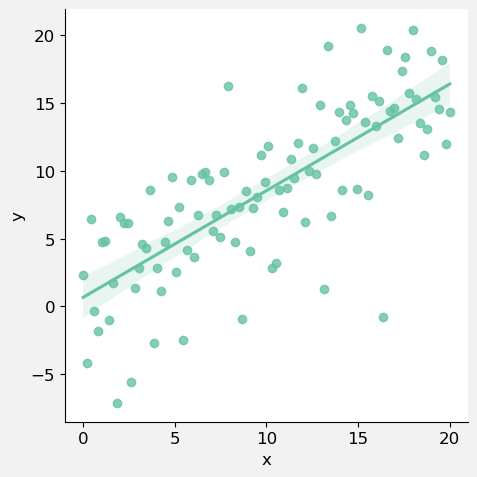

In [11]:
sns.lmplot(x="x", y="y", data=fakeDF)

### Regression to the mean and mistaken interpretation: A simulation. 

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=b7ed30dd-a9a5-49f6-8096-af0400bb3257&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

It is easy to easy to make incorrect inference of regression results - confusing causation with statistical correlation. 

We simulate the example from ROS p. 80

Let's say we have two sequential exam scores for 1000 students - a mid-term and final exam. 

We consider that an exam score is a sum of two components:

true ability, which is distributed normally among students, with a mean of 50 and standard deviation of 10. 

And an error component, (think, you slept poorly the night before, you got an unexpected answer, etc). 

In [12]:
n = 1000
true_ability = spt.norm.rvs(50, 10, n, random_state=1234)
noise_1 = spt.norm.rvs(0,10,n)
noise_2 = spt.norm.rvs(0,10,n)
midterm = true_ability + noise_1
final = true_ability + noise_2
exams = pd.DataFrame({"midterm":midterm, "final": final})

Given that we have this data, we could naively ask if the midterm exam can predict the score on the final exam. So we run a regression: 

In [13]:
mod2 = smf.ols(formula='final~midterm', data=exams).fit()

In [14]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  final   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                     235.4
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           7.42e-48
Time:                        15:33:32   Log-Likelihood:                -3936.4
No. Observations:                1000   AIC:                             7877.
Df Residuals:                     998   BIC:                             7887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     27.8178      1.501     18.528      0.000      24.871      30.764
midterm        0.4475      0.029     15.342      0.000       0.390       0.505
==============================================================================
Omnibus:                        0.091   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.956   Jarque-Bera (JB):                0.093
Skew:                           0.023   Prob(JB):                        0.955
Kurtosis:                       2.989   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

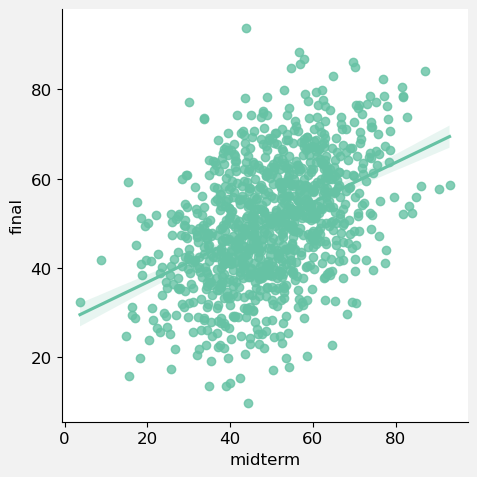

In [15]:
sns.lmplot(x="midterm", y="final", data=exams)

We get a coefficient of .50, which is to say that we predict that a student who scored 10 points higher on the midterm will score about 5 points higher on the final. 

We might be tempted to over-interpret this however. Noting that a student who does very well on the midterm, will also tend to do well on the final, but less so (5 points higher than average rather than 10 points higher than average). We might start speculating that a very good grade leads people to get overconfident and do less well on the next exam. 

But that would be wrong - we created this data, and the exam scores were created purely based on ability and a random component. 

This is just an example of **regression to the mean**. This explains why a very tall mother will also tend to have a tall daughter, but on average less so than the mother. 

## Regression with a single predictor: real data

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=fcf40b83-a491-41f9-8cf9-af0400bb3263&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Let's use the dataset we constructed in lab 3 where we combined macroeconomic data on countries with data on infections and deaths from the coronavirus

In [16]:
pwt = pd.read_csv("http://jmaurit.github.io/anv_statistikk/data/pwt2019plus.csv")

In [17]:
pwt

,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,pl_i,pl_g,pl_x,pl_m,pl_n,pl_k,type,cases,rgdpe_per_pers,cases_per_pers
0,AGO,Angola,Kwanza,2019,228151.01560,227855.71880,31.825295,16.644962,NaN,1.481984,...,0.342872,0.240024,0.476486,0.611627,0.209101,0.378033,confirmed,97263.0,7168.857841,0.003056
1,ALB,Albania,Lek,2019,35890.01953,36103.04297,2.880917,1.075898,NaN,2.964992,...,0.456882,0.235589,0.629832,0.525463,0.299344,NaN,confirmed,248070.0,12457.845724,0.086108
2,ARE,United Arab Emirates,UAE Dirham,2019,681525.81250,645956.25000,9.770529,5.808834,NaN,2.746695,...,0.480580,0.692488,0.688882,0.647336,0.268754,NaN,confirmed,828328.0,69753.215256,0.084778
3,ARG,Argentina,Argentine Peso,2019,991646.31250,977420.56250,44.780677,20.643215,1609.068998,3.096804,...,0.616060,0.312739,0.647736,0.631130,0.377946,0.758450,confirmed,7940657.0,22144.513637,0.177323
4,ARM,Armenia,Armenian Dram,2019,41048.62891,43582.57422,2.957731,0.966091,NaN,3.135995,...,0.577787,0.176624,0.666217,0.587048,0.432372,0.617077,confirmed,352399.0,13878.418595,0.119145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,UZB,Uzbekistan,Uzbekistan Sum,2019,378534.25000,414768.46880,32.981716,14.624535,NaN,NaN,...,0.304824,0.048096,0.607671,0.642990,0.108770,0.249714,confirmed,215063.0,11477.093854,0.006521
144,YEM,Yemen,Yemeni Rial,2019,50052.93359,51828.05859,29.161922,5.531877,NaN,1.842989,...,0.238807,0.211786,0.632594,0.670528,0.171695,NaN,confirmed,10585.0,1716.379791,0.000363
145,ZAF,South Africa,Rand,2019,748940.00000,734094.37500,58.558270,18.642710,2191.363362,2.908202,...,0.523813,0.447869,0.660216,0.604546,0.312701,0.515177,confirmed,3582691.0,12789.653793,0.061182
146,ZMB,Zambia,Kwacha,2019,57956.18359,56783.71484,17.861030,5.225448,NaN,2.686845,...,0.482041,0.330470,0.574416,0.531915,0.296795,0.342464,confirmed,301924.0,3244.839944,0.016904


Let's again explore the question of whether corona is "rich world" epidemic. We run a simple regression between real GDP (expenditure) per person and cases per person. 

Since both rGDP and cases per person are all non-negative positive variables and I wish to be able to interpret my model coefficients as elasticities, I will transform both variables to log: 

In [18]:
pwt["log_rgdp"] = np.log(pwt.rgdpe_per_pers) #I shorten the variable name: "per person" is now implicit
pwt["log_cases"] = np.log(pwt.cases_per_pers)

It is good practice to always plot your data ahead of time

<AxesSubplot:xlabel='log_rgdp', ylabel='log_cases'>

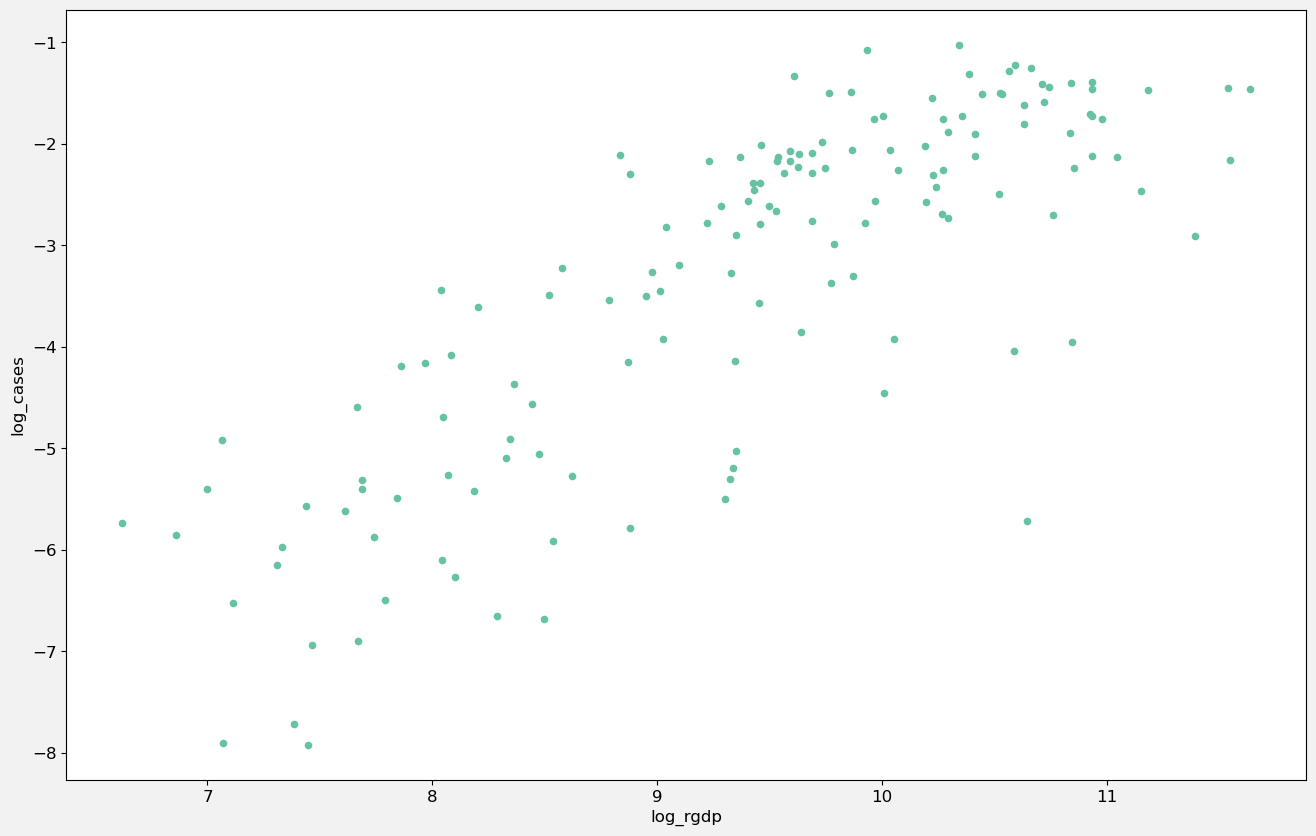

In [19]:
pwt.plot.scatter("log_rgdp", "log_cases")

An assumption of a linear log-log relationship looks reasonable. 

The model we are then estimating is: $log(cases) = a + b*log(rgdp) + \epsilon$

In [20]:
mod3 = smf.ols(formula = "log_cases~log_rgdp", data=pwt).fit()

In [21]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_cases   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     268.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           6.57e-35
Time:                        15:34:18   Log-Likelihood:                -212.89
No. Observations:                 148   AIC:                             429.8
Df Residuals:                     146   BIC:                             435.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.4496      0.684    -21.119      0.000     -15.802     -13.097
log_rgdp       1.1823      0.072     16.391      0.000       1.040       1.325
==============================================================================
Omnibus:                       17.372   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.615
Skew:                          -0.845   Prob(JB):                     5.50e-05
Kurtosis:                       3.568   Cond. No.                         77.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

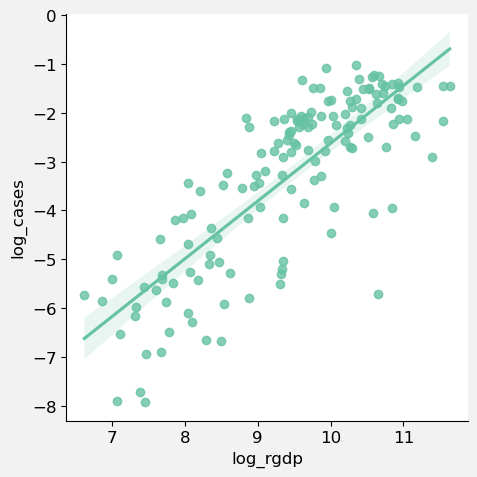

In [22]:
sns.lmplot(x="log_rgdp", y="log_cases", data=pwt)

### Point estimates

The **intercept term** gives us our estimate of $a$. We interpret this as the predicted value of log_cases when log_rgdpe is zero (y = a+ b*0 => y=a). Since none of the countries in our data have anything close to having 0 in log-GDP, this really doesn't give us much useful information.

We are again interested in the estimate of the **slope term**, $\hat{b}=1.18$.  We can interpret this to mean that a country that had 1 additional log rgdp per person, will be predicted to have 1.18 more in log cases per capita. 

With such log-log transformed data, we can approximately interpret the coefficient as an elasticity. So we could also say that a country with a 1% larger real GDP per person will tend to have a 1.18% higher recorded cases. (Notice that we are interpreting our coefficients in terms of comparisons, as ROS recommends). 

### Uncertainty and standard errors

The coefficient estimate $\hat{b}=1.18$ is estimated with uncertainty, and again it is the standard error that tells us about the magnitude of this uncertainty. The standard error is reported as .072, so we could construct a quick 95% confidence interval by adding +/- 2*.072: CI $\approx$ 1.04 to 1.32

This confidence interval does not include 0, so we can say that the estimated coefficient is "significant at the 5% level", but as ROS discusses, this is perhaps not the most interesting of results. 

We can also calculate our residual standard deviation, which is an estimate of the model standard deviation $\sigma$

In [23]:
np.sqrt(mod3.mse_resid)

1.026687779340522

We can say that about 68% of the actual country outcomes will lie between +- 1.02 log-cases of the regression line

### Prediction

Let's say we want to use our model to predict the cases per capita of Norway. 

In [24]:
norway_rgdp = pwt["log_rgdp"].loc[pwt.country=="Norway"]

To get just the point estimate: 

In [25]:
norway_pred = mod3.predict(norway_rgdp)
norway_pred

105   -1.392514
dtype: float64

Or we could use: 

In [26]:
norway_prediction = mod3.get_prediction(norway_rgdp)

Then we can a bit more information on the prediction, including specifying a 95% confidence interval

In [27]:
pred_CI = norway_prediction.conf_int()
pred_CI

array([[-1.67860241, -1.10642594]])

Taking the exponent to convert back to cases per capita: 

In [28]:
np.exp(norway_pred)

105    0.24845
dtype: float64

In [29]:
np.exp(pred_CI)

array([[0.18663463, 0.33073893]])

And the actual cases per capita: 

In [30]:
np.exp(pwt["log_cases"].loc[pwt.country=="Norway"])

105    0.119196
Name: log_cases, dtype: float64

This model does not give a good prediction for Norway, it looks like. The actual realized value, is well outside even a 95% confidence interval for the model. 

A good forecast should also include some measure of uncertainty - we will come back to this. 

### Causality - what's really going on. 

Cases per capita and real gdp per capita seem to be clearly related. But it would probably be foolish to give this regression a **causal interpretation**. Higher GDP does not directly cause higher cases per capita. 

There are several potential explanations. 

**Lurking** or **missing variable**: Likely we have a variable that is both correlated with registered cases per capita and real GDP that is determining this relationship. If older people are more likely to get seriously sick, and in turn get tested, and high GDP countries tend to have older population, this will lead to correlation. 

**Measurement problems and data collection**: Registering the number of cases is expensive and perhaps only rich countries have the resources to spend on testing and registering corona cases. 

### Inference on means and differences using regression

In lab 6 we spent a good deal of time discussing inference on sample means and mean differences between groups. We can formulate simple regression models that will give us the same result. 

If we wanted to estimate a mean value together with standard deviation, we could run a regression with only a constant ("intercept") term. 

In [31]:
mod4 = smf.ols(formula = "cases_per_pers~1", data=pwt).fit()

In [32]:
mod4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_pers   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                nan
Time:                        15:34:44   Log-Likelihood:                 151.83
No. Observations:                 148   AIC:                            -301.7
Df Residuals:                     147   BIC:                            -298.7
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0888      0.007     12.415      0.000       0.075       0.103
==============================================================================
Omnibus:                       17.633   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.123
Skew:                           0.925   Prob(JB):                     2.59e-05
Kurtosis:                       3.005   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can also create indicator variables for certain categories and use regression to calculate the mean for each category. 

Below we will use regression to calculate the mean value for Nordic countries: 

In [33]:
Nordics = ["Sweden", "Norway", "Finland", "Denmark", "Iceland"]

pwt["nordic"] = np.where(pwt.country.isin(Nordics), 1, 0)

In [34]:
mod5 = smf.ols(formula = "cases_per_pers~nordic", data=pwt).fit()

In [35]:
mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         cases_per_pers   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     3.234
Date:                Mon, 19 Sep 2022   Prob (F-statistic):             0.0742
Time:                        15:34:46   Log-Likelihood:                 153.45
No. Observations:                 148   AIC:                            -302.9
Df Residuals:                     146   BIC:                            -296.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0864      0.007     11.965      0.000       0.072       0.101
nordic         0.0707      0.039      1.798      0.074      -0.007       0.148
==============================================================================
Omnibus:                       19.670   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.877
Skew:                           0.980   Prob(JB):                     6.54e-06
Kurtosis:                       3.165   Cond. No.                         5.54
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Monte Carlo fake data simulation

<iframe src="https://ntnu.cloud.panopto.eu/Panopto/Pages/Embed.aspx?id=3138718e-2163-40d1-8dfa-af0400bb3258&autoplay=false&offerviewer=true&showtitle=true&showbrand=true&captions=false&interactivity=all" height="405" width="720" style="border: 1px solid #464646;" allowfullscreen allow="autoplay"></iframe>

Consider our regression of corona cases on gdp where we estimated the following equation

log_cases = -14.5 + 1.18*log_rgdp

and where $\hat{\sigma} = 1.02$

A fundamental problem in regression analysis is that we are estimating from some "true values" or a "generative process" that usually we do not know the details of. This can make it hard to determine if our estimates really represent what we think they represent. 

An excellent tool for checking our model is therefor to create fake data from a "true" model and then do a regression on that data to see if we are estimating what we think we are estimating. 

This becomes particularly helpful in more complex situations, but we will demonstrate the technique with this simple regression. 

We start by assuming that our estimated model is the "true" model and create data based on that data: 


In [36]:
a= -14.5
b=1.18
n=150
sigma = 1.02
x=np.linspace(6.5,11.5,n)
epsilon = spt.norm.rvs(0,sigma,n,random_state=1234)

y=a+b*x + epsilon

We can compare our fake data with our real data. 

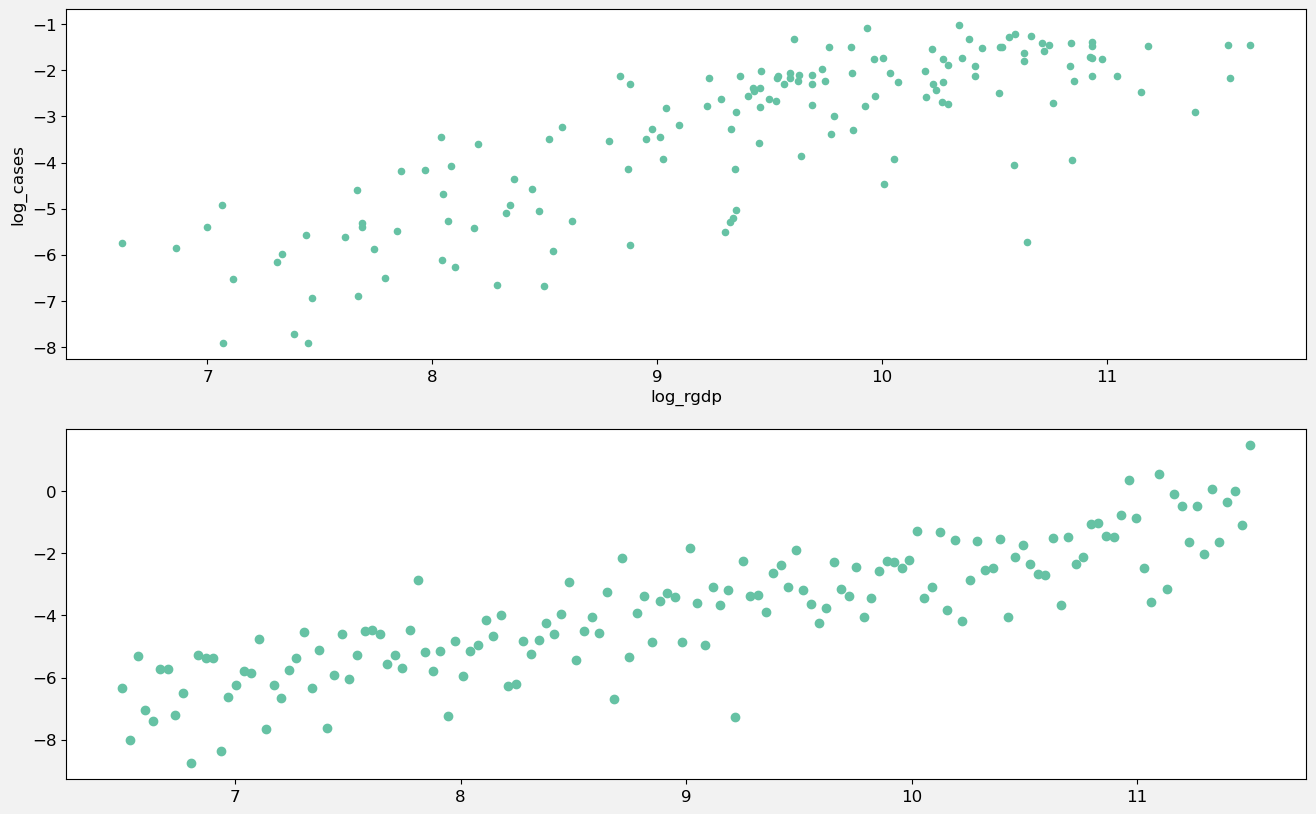

In [37]:
fig, ax = plt.subplots(2)
pwt.plot.scatter("log_rgdp", "log_cases", ax=ax[0])
ax[1].scatter(x,y)

It's not perfect - we see for example that there seems to be a flattening out at a certain level of real GDP. We could probably find ways of improving the model (exactly the point of such fake data exercises). But for now, let's say the model is adequate. 

Now let's estimate a model with our fake data: 


In [38]:
fakeDF = pd.DataFrame({"x":x, "y":y})

mod5 = smf.ols(formula = "y~x", data=fakeDF).fit()

mod5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     441.9
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           2.76e-46
Time:                        15:34:50   Log-Likelihood:                -214.87
No. Observations:                 150   AIC:                             433.7
Df Residuals:                     148   BIC:                             439.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -14.6657      0.523    -28.055      0.000     -15.699     -13.633
x              1.2054      0.057     21.021      0.000       1.092       1.319
==============================================================================
Omnibus:                        9.308   Durbin-Watson:                   2.439
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.526
Skew:                          -0.511   Prob(JB):                      0.00854
Kurtosis:                       3.691   Cond. No.                         57.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here we see that the estimate of 1.2 is quite close to the "true" value of 1.18. We can also extract a 95% confidence interval for the estimate (or we could have easily estimated ourselves): 


In [39]:
b_hat = mod5.params[1]

cov_b = mod5.cov_params()

cov_b

,Intercept,x
Intercept,0.273273,-0.029592
x,-0.029592,0.003288


In [40]:
SE_b = np.sqrt(cov_b.iloc[1,1])
SE_b

0.057341411557687585

And see that the **coverage** of our 95% CI includes the true value

In [41]:
[b_hat-2*SE_b, b_hat+2*SE_b]

[1.0906812113778797, 1.32004685760863]

We can let python test this and convert to an integer (True=1, False=0)

In [42]:
CI_low = b_hat - 2* SE_b
CI_high =  b_hat + 2* SE_b

int((b> CI_low) & (b<CI_high))

1

But we also want to get an idea of the uncertainty in our data. Will we on average estimate the correct values? Are our estimates of uncertainty approximately correct? 

We should for example observe that about 95% of our estimates land within the 95% confidence interval. 

We can do a simulation to answer these question. This type of simulation, which we also saw in lab 5, are called **monte-carlo simulations**.

In [43]:
nsim = 1000

b_hats = []
cover_95 = []

for s in range(nsim):  
    epsilon = spt.norm.rvs(0,sigma,n) # the epsilon part of the fake data is now within the loop, 
    #so we create a new dataset in each loop. 
    y=a+b*x + epsilon
    fakeDF = pd.DataFrame({"x":x, "y":y})
    mod6 = smf.ols(formula = "y~x", data=fakeDF).fit()
    b_hat = mod6.params[1]
    b_hats.append(b_hat) # save a list of all our estimated b's
    CI_b = mod6.conf_int().iloc[1, :] #We take a short cut of just getting the CI from the model object
    cover_95.append(int((b>CI_b[0]) & (b<CI_b[1])))
    
        

This should take a few minutes

In [44]:
cover_95 = np.array(cover_95)
cover_95.mean()

0.937

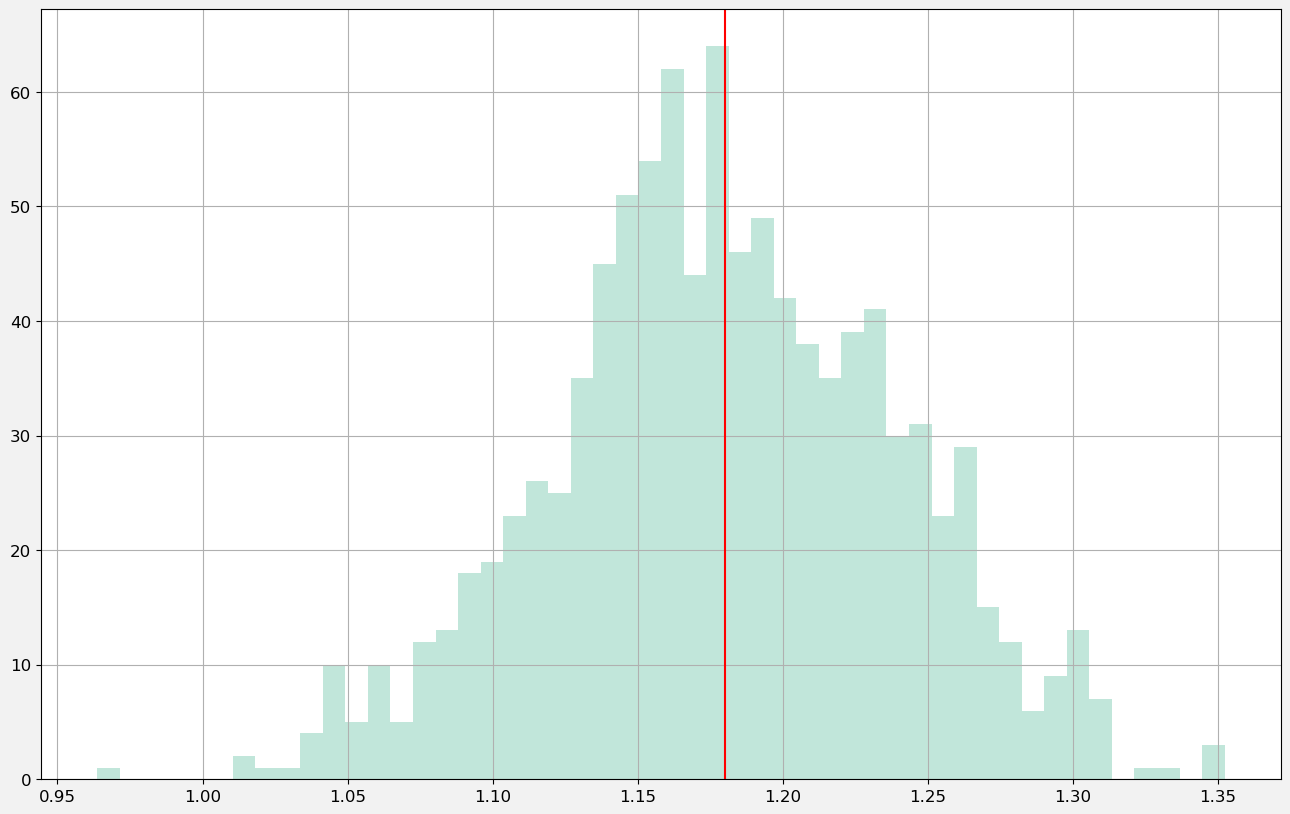

In [45]:
b_hats = pd.Series(b_hats)
fig, ax = plt.subplots()
b_hats.hist(ax=ax, bins=50, alpha=.4)
ax.axvline(x=b, color="red")

The above figure shows all our estimated coefficients displayed as a histogram. The red line represents the "true value". The bell-like curve centered on the true value is exactly what we would want to see if we have a good model to our data. 

## Fitting a regression model (ROS ch. 8)

We have so far fitted regression models without discussing much about exactly how those models have been fit. There are in fact several ways to fit a regression models. Luckily, for simple cases they will all give very similar results. In this lab we will take a short look at two such common methods **Ordinary Least Squartes (OLS)** and **Maximum Likelihood (ML)**. We will save discussion of a third method, **Bayesian inference** for later. 

## Ordinary Least Squares

Let's again create some fake data

<AxesSubplot:xlabel='x', ylabel='y'>

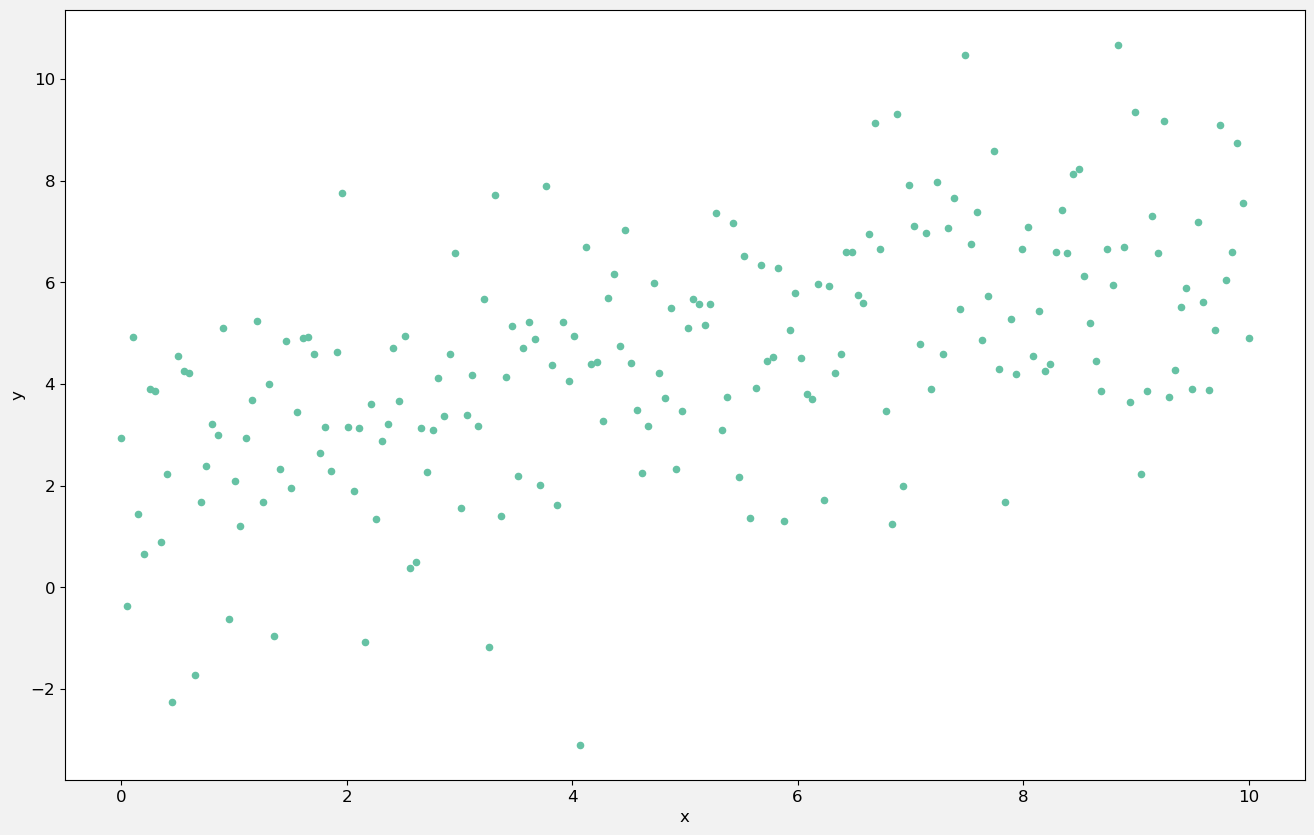

In [46]:
a= 2
b=.5
n=200
sigma = 2
x=np.linspace(0,10,n)
epsilon = spt.norm.rvs(0,sigma,n,random_state=1234)

y=a+b*x + epsilon

fakeDF = pd.DataFrame({"x":x, "y":y})
fakeDF.plot.scatter(x="x", y="y")

The simple idea behind OLS is that we wish to estimate a line that will minimize the amount of errors. That is, in the case with one predictor variable and an intercept, if we estimate a line with intercept, $\hat{a}$ and slope $\hat{b}$ then we can define our **residuals** for any observation i: 

$$r_i = y_i - (\hat{a} + \hat{b}*x_i)$$

That is, the residual is the difference between the actual y-value of an observation and the predicted value (\hat{y} = \hat{a} + \hat{b}*x_i).

With OLS, our goal is to choose a line to minimize the squared sum of these residuals (Residual Sum of Squares): 

So let's say we guess a line: 



In [47]:
a_guess = 1

b_guess = .3

Then we can estimate our RSS: 

In [48]:
y_guess = a_guess + b_guess*x

residuals = y - y_guess

RSS = np.sum(residuals**2)

We could easily program in an algorithm to find estimates for a and b that minimize RSS, but luckily, using a bit of math we can show that the estimated a and b that minimize RSS are: 


$$\hat{b} = \frac{cov(x,y)}{var(x)} $$
$$\hat{a} =  \bar{y} - \hat{b}*\bar{x}$$

We calculate these below:

In [49]:
b_hat = np.cov(x,y, ddof=1)[0,1]/np.var(x, ddof=1)


a_hat = np.mean(y) - b_hat*np.mean(x)

print(a_hat, b_hat)

2.243351906007604 0.4483212507972464


We can estimate the residual standard deviation, $\hat{\sigma}$

In [50]:
y_hat = a_hat + b_hat*x

sigma_hat = np.sqrt(np.sum((y-y_hat)**2)/n-2)

sigma_hat

1.3721229050921124

Notice that we divide by n-2, since we have n-2 degrees of freedom, we "used up" two of data points in order to estimate the intercept and slope terms. 

### Maximum likelihood. 

Maximum likelihood estimation takes a somewhat different approach. As you can read about in ROS (p.105), in maximum likelihood estimation, we are assuming a certain distribution of our y variable, conditional on a, b, $\sigma$, X). 

Basically, you are asking, what is the probability of getting a certain $y_i$ level, given (a,b,$\sigma$ and $x_i$), and then we choose estimates for a and b that maximize the combined likelihood for all $y$ values. 

As it turns out, if our data is normally distributed, then maximum likelihood and OLS give the same answer for simple linear regression. 

In [51]:
ML_mod1 = smf.glm(formula="y~x", data=fakeDF).fit()
ML_mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      198
Model Family:                Gaussian   Df Model:                            1
Link Function:               identity   Scale:                          3.9219
Method:                          IRLS   Log-Likelihood:                -419.44
Date:                Mon, 19 Sep 2022   Deviance:                       776.54
Time:                        15:35:10   Pearson chi2:                     777.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.3504
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2434      0.279      8.040      0.000       1.696       2.790
x              0.4483      0.048      9.288      0.000       0.354       0.543
==============================================================================
"""

Above, we use the "glm" or Generalized Linear Model function in statsmodels, which use maximum likelihood estimation. The "generalized" here means that we are not restricted to an assumtion of a normally distributed y-variable. We could, for example, also have binary data (1/0) and where we use an assumption of a binomial distribution in the maximum likelihood estimation. 

# Assignment

### 1. Running a simple regression
    
In Penn World tables data ("http://jmaurit.github.io/anv_statistikk/data/pwt100.csv") consider the relationship between average hours worked for employed persons (avh) and real per capita GDP in 2019 (rgdpe/pop). 

- Run a simple regression of average hours worked on rgdpe with statsmodels
- plot the data with the regression line overlayed
- What is the 95% confidence interval of the relationship? 
- What is the estimated $\sigma$ of the model?
- Briefly discuss whether you think the relationship is causal? 

### 2.) Fake data simulation with a lurking variable. 
    - Generate a model based on a lurking variable - generate X, Y and Z variables where both X and Y depend on  on Z (but not on one-another). 
    - Run a regression of Y on X, does the regression suggest a relationship between the variables. 
    - Now add Z as an exogenous regressor in the regression. How does this change the suggested relationships.

### 3.)  Monte Carlo Experiment
  
Let us say we have data on 10 recent graduates from a Norwegian business school who have gone to work at a consulting company. The company has a first-year associate review where associates are graded on a scale from 1 to 10 on a series of evaluations. The company also has the business school GPA (grade point average) from 1 to 5. 

The data for these 10 students: GPA (X) and first-year evaluation (Y) is generated below: 

In [3]:
n=10
a= 5
b=.4

sigma = 1.5

b=.5
x = spt.uniform.rvs(1,4,n,random_state=4321)

epsilon = spt.norm.rvs(0,sigma,n,random_state=1234)

y=a+b*x + epsilon

print("x", x)
print("y", y)



x [1.2832115  4.26025604 4.07161984 2.14541801 1.77237725 4.91564884
 2.62491485 4.03107147 1.35660706 2.23953387]
y [6.3487585  5.34366448 9.18487037 5.60373116 4.80530552 8.78856883
 7.60184005 6.06075048 5.70184809 2.7557395 ]


- Run a regression of first-year evaluation on GPA. What is the estimated coefficient on GPA? What is the 95% confidence interval of the coefficient on GPA? Would the estimate by seen as "significant" in the traditional frameworks?

- Now run a Monte-Carlo experiment with repeated estimations of the coefficient on GPA? What is the coverage of the 95% intervals?

### 4.) Manual OLS

Run the regression from assignment 1, but now manually calculate the estimates for b, a and $\sigma$

### 5.) Free problem

Choose your own dataset and run a simple (but preferably meaningful) regression of one variable on another. 

- Plot the regression line over the data. 

- Give an interpretation of the results and discuss whether there may be "lurking" variables. 